# Data Science and Business Analytics Intern

# Sourav Prakash Mohanty 

# The Sparks Foundation #GRIPFEB'2021'

# Task 3 - Exploratory Data Analysis - Retail


# Problem Statement - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’


# Importing libraries

In [32]:
import pandas as pd 
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt 
import matplotlib.style as style

import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.shape

(9994, 13)

In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
df.duplicated().sum()

17

In [14]:
df.corr

<bound method DataFrame.corr of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

# Data Visualization

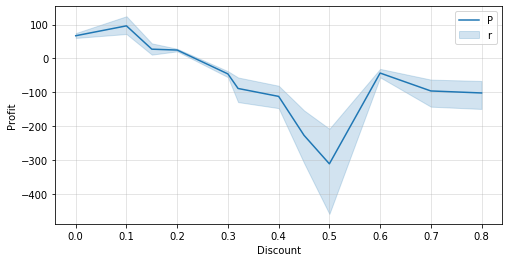

In [15]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.legend('Profit')
plt.grid(alpha=0.4)

**Analysis using Pairplot**

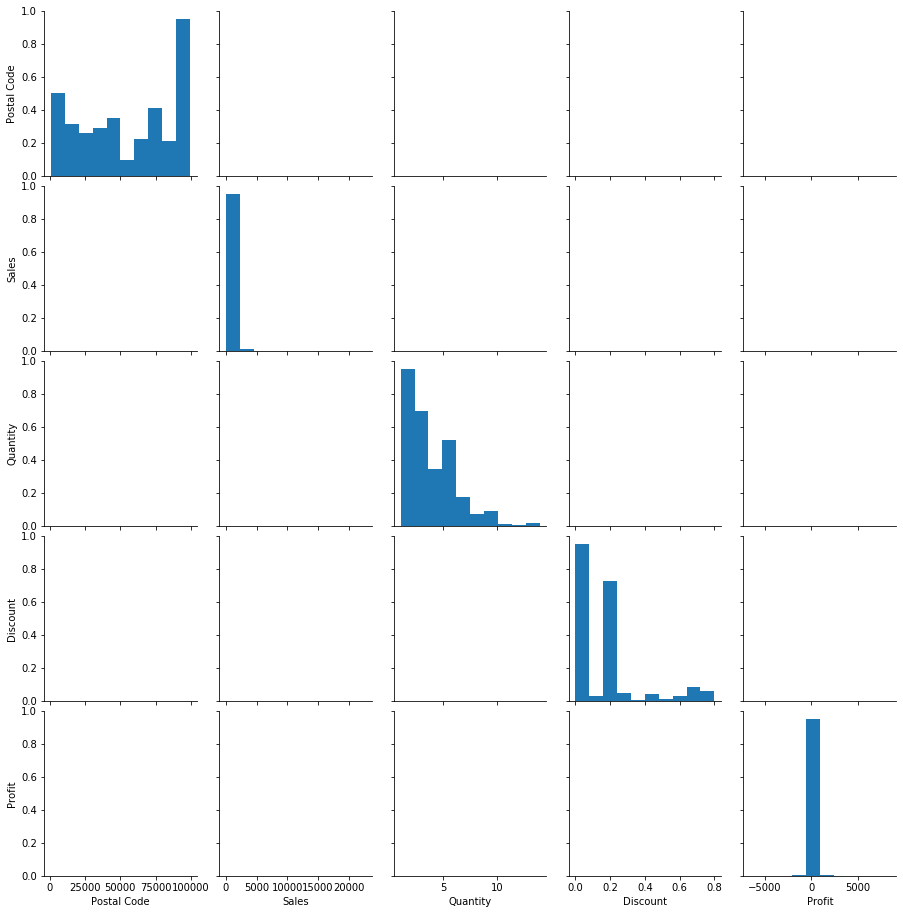

In [16]:
sns.pairplot(df, kind="kde")

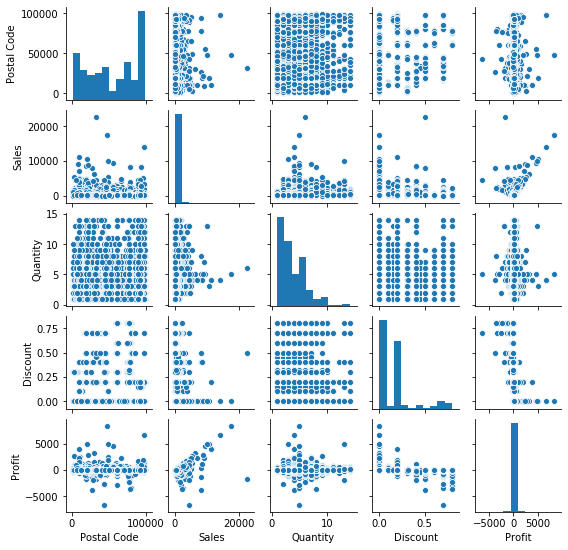

In [18]:
sns.pairplot(df, height=1.5)

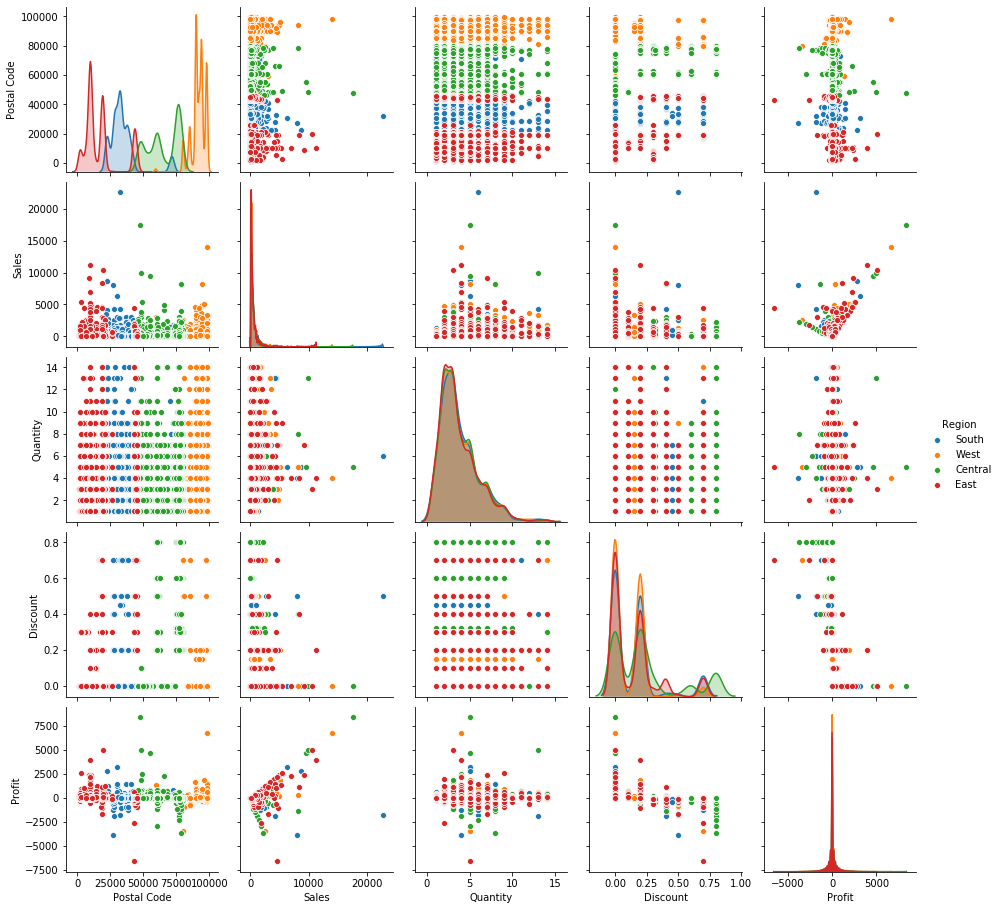

In [19]:
sns.pairplot(df,hue='Region')

**Analyzing variables using correlation matrix**

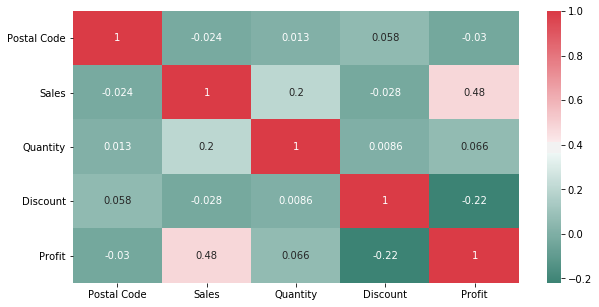

In [21]:
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True, cmap=sns.diverging_palette(170, 10, as_cmap=True))

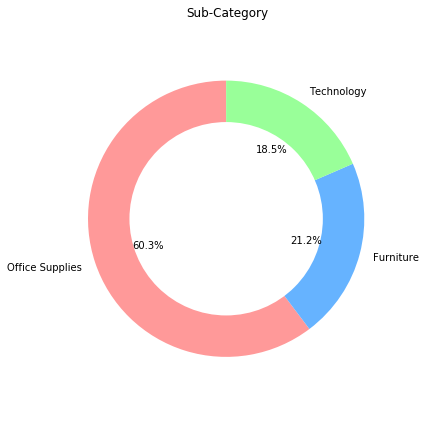

In [22]:
plt.figure(figsize=(6,6))
plt.title('Sub-Category')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(df['Category'].value_counts(), colors=colors, labels=df['Category'].value_counts().index,autopct='%1.1f%%', startangle=90 )
centre_circle = plt.Circle((0,0),  0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

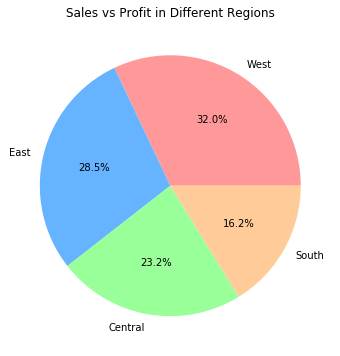

In [23]:
plt.figure(figsize = (6,6))
plt.title('Sales vs Profit in Different Regions')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(df['Region'].value_counts(),colors=colors, labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

**Top 5 states Sales vs Profit**

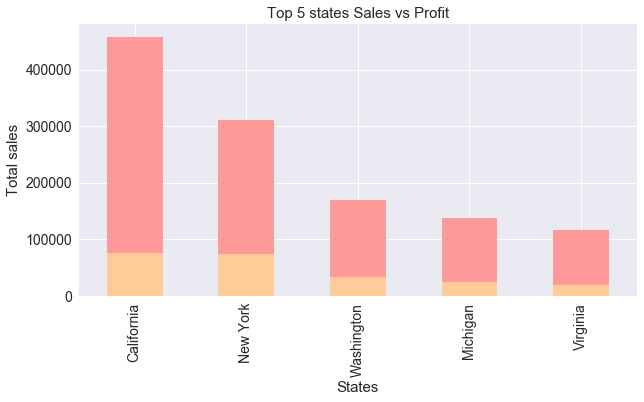

In [25]:
# First Five observations for sales in top states
top_states_s = df.groupby("State").Sales.sum().nlargest(n=5)

# First Five observations for profit in top states
top_states_p = df.groupby("State").Profit.sum().nlargest(n = 5)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = '#ff9999')
top_states_p.plot(kind = 'bar',figsize = (10,5),fontsize = 14, color = '#ffcc99')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 5 states Sales vs Profit",fontsize = 15)
plt.show()

**Distribution of the data using the plot**

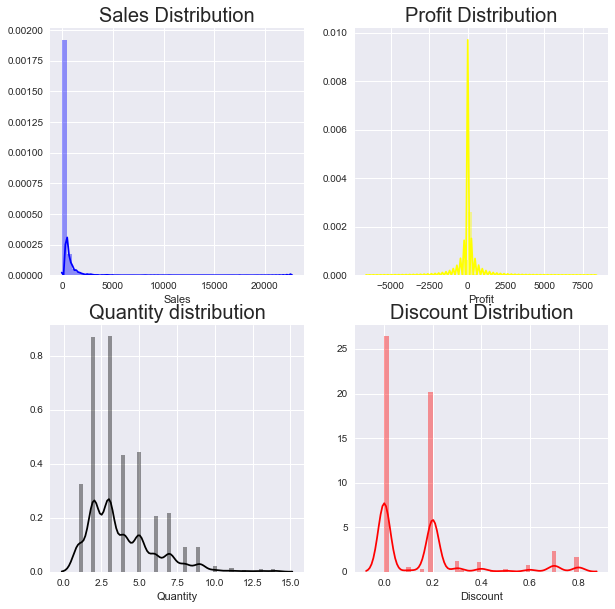

In [27]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(df['Sales'], color = 'blue',  ax = axs[0][0])
sns.distplot(df['Profit'], color = 'yellow',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'black',  ax = axs[1][0])
sns.distplot(df['Discount'], color = 'red',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

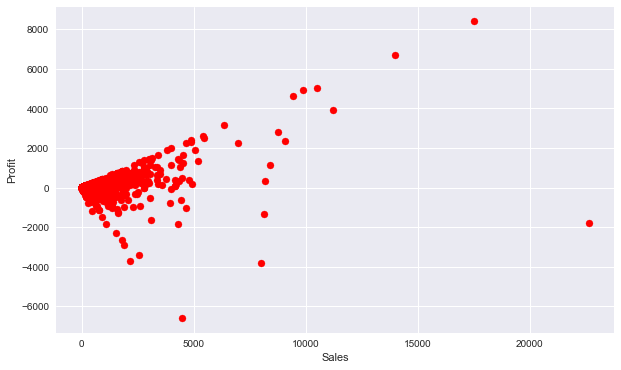

In [28]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['Sales'],df['Profit'],color='red')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

**Checking the interdependency of Sales,Profits and Discounts**

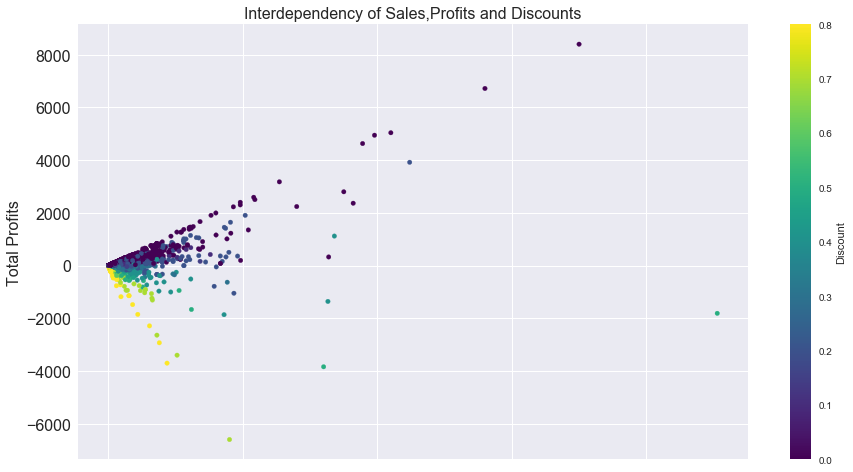

In [30]:
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (15,8), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 16)

plt.show()

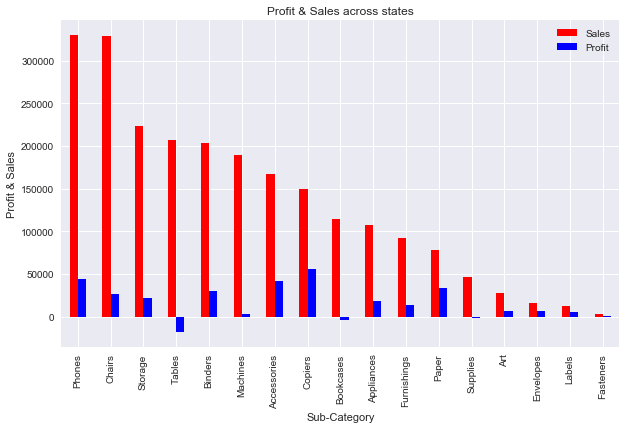

In [31]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','blue'],figsize=(10,6))
plt.title('Profit & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit & Sales')
plt.show()

# THANK YOU